In [94]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras as krs
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.utils import to_categorical
import math
from keras.layers import LeakyReLU
from google.colab import files
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
set_random_seed(2)
uploaded = files.upload()

Saving breast-cancer.names to breast-cancer.names


In [81]:
# This portion of the code imports the data, makes a correspondence between
#word given and numbers between 0 and 1 and splits the data into the inputs 
#output and splits the data into training and testing data
# 75%-25%


data=np.array([])
with open('breast-cancer.data') as f:
    lines=f.readlines()
    for line in lines:
        myarray =np.chararray.split(line,",")
        #print(myarray)
        data=np.append(data,myarray)
        
#print(data) 
l=len(data)
Y=np.zeros((l,1))
for i in range(l):
    if data[i][0]=='no-recurrence-events':
           Y[i][0]=0
    elif data[i][0]=='recurrence-events':      
           Y[i][0]=1
#print(Y)
X=np.zeros((l,9))
for i in range(l):
    if data[i][1]=='10-19':
           X[i][0]=0
    elif data[i][1]=='20-29':      
           X[i][0]=0.125
    elif data[i][1]=='30-39':
           X[i][0]=0.25
    elif data[i][1]=='40-49':
           X[i][0]=0.375 
    elif data[i][1]=='50-59':
           X[i][0]=0.5 
    elif data[i][1]=='60-69':
           X[i][0]=0.625
    elif data[i][1]=='70-79':
           X[i][0]=0.75
    elif data[i][1]=='80-89':
           X[i][0]=0.875
    elif data[i][1]=='90-99':
           X[i][0]=1
        
for i in range(l):
    if data[i][2]=='lt40':
           X[i][1]=0
    elif data[i][2]=='ge40':      
           X[i][1]=0.5
    elif data[i][2]=='premeno':
           X[i][1]=1  

        
for i in range(l):
    if data[i][3]=='0-4':
           X[i][2]=0
    elif data[i][3]=='5-9':      
           X[i][2]=0.09
    elif data[i][3]=='10-14':
           X[i][2]=0.18
    elif data[i][3]=='15-19':
           X[i][2]=0.27 
    elif data[i][3]=='20-24':
           X[i][2]=0.36
    elif data[i][3]=='25-29':
           X[i][2]=0.45
    elif data[i][3]=='30-34':
           X[i][2]=0.54
    elif data[i][3]=='35-39':
           X[i][2]=0.63
    elif data[i][3]=='40-44':
           X[i][2]=0.72
    elif data[i][3]=='45-49':
           X[i][2]=0.81
    elif data[i][3]=='50-54':
           X[i][2]=0.9
    elif data[i][3]=='55-59':
           X[i][2]=0.99
            
        
for i in range(l):        
    if data[i][4]=='0-2':
           X[i][3]=0
    elif data[i][4]=='3-5':      
           X[i][3]=0.08
    elif data[i][4]=='6-8':
           X[i][3]=0.16
    elif data[i][4]=='9-11':
           X[i][3]=0.24
    elif data[i][4]=='12-14':
           X[i][3]=0.32
    elif data[i][4]=='15-17':
           X[i][3]=0.4
    elif data[i][4]=='18-20':
           X[i][3]=0.48
    elif data[i][4]=='21-23':
           X[i][3]=0.56
    elif data[i][4]=='24-26':
           X[i][3]=0.64
    elif data[i][4]=='27-29':
           X[i][3]=0.72
    elif data[i][4]=='30-32':
           X[i][3]=0.8
    elif data[i][4]=='33-35':
           X[i][3]=0.88
    elif data[i][4]=='36-39':
           X[i][3]=0.96        
 
        
for i in range(l):
    if data[i][5]=='yes':
           X[i][4]=0
    elif data[i][5]=='no':      
           X[i][4]=1
    #else:
    #    print("e",data[i][5],i)
    
for i in range(l):
    if data[i][6]=='1':
           X[i][5]=0
    elif data[i][6]=='2':      
           X[i][5]=0.5
    elif data[i][6]=='3':      
           X[i][5]=1        
         
        
for i in range(l):
    if data[i][7]=='left':
           X[i][6]=0
    elif data[i][7]=='right':      
           X[i][6]=1       
 
        
        
for i in range(l):
    if data[i][8]=='left_up':
           X[i][7]=0
    elif data[i][8]=='left_low':      
           X[i][7]=0.25
    elif data[i][8]=='right_up':      
           X[i][7]=0.5  
    elif data[i][8]=='right_low':      
           X[i][7]=0.75
    elif data[i][8]=='central':      
           X[i][7]=1        
    #else:
    #    print("e2", data[i][8],i) 

for i in range(l):
    if data[i][9]=='yes\n':
           X[i][8]=0
    elif data[i][9]=='no\n':      
           X[i][8]=1
            
#print(X)  

Y=np.delete(Y,[145,163,164,183,184,233,263,264,206],0)
X=np.delete(X,[145,163,164,183,184,233,263,264,206],0)


Ytr = np.array([[1]]) 
Yte = np.array([[1]]) 
for i in range (0,Y.shape[0]):
    if (math.modf(i/4)[0]== 0): 
        Yte=np.insert(Yte,len(Yte),[Y[i]],axis=0)  
    else:
        Ytr=np.insert(Ytr,len(Ytr),[Y[i]],axis=0) 
  
Ytr=np.delete(Ytr,0,axis=0)
Yte=np.delete(Yte,0,axis=0)

Xtr=np.array([[1,1,1,1,1,1,1,1,1]])
Xte=np.array([[1,1,1,1,1,1,1,1,1]])
for i in range (0,X.shape[0]):
    if (math.modf(i/4)[0]== 0):
        Xte=np.concatenate((Xte,[X[i]]),axis=0)
    else:
        Xtr=np.concatenate((Xtr,[X[i]]),axis=0) 
Xtr=np.delete(Xtr,0,axis=0)
Xte=np.delete(Xte,0,axis=0)

val_data=[Xte,Yte]
#print("Ytr:",Ytr,"\n Yte:",Yte)
#print(val_data)
print(len(Y))


277


Etrain: 0.18422643753929416 Etest: 0.1780003752027239
Etrain: 0.29179506846096204 Etest: 0.3019389352628163
Etrain: 0.1763853469260649 Etest: 0.16732991252626692


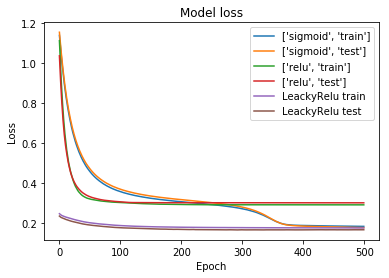

In [100]:
#MSE 0.001 ^2

seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
            
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
            
            
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Etrain: 0.1879308927030379 Etest: 0.18162420902933393
Etrain: 0.2934241885148385 Etest: 0.30356667542031834
Etrain: 0.17830071389531169 Etest: 0.1682783876146589


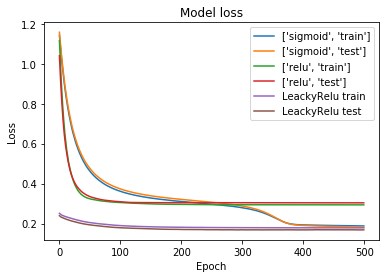

In [99]:
#MSE 0.001 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.001), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.001), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

    model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.001), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.001), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
            
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.19985339729394314 Etest: 0.19954241939953396
Etrain: 0.2949812193423654 Etest: 0.30510682612657547
Etrain: 0.18249907265394782 Etest: 0.17386827639171054


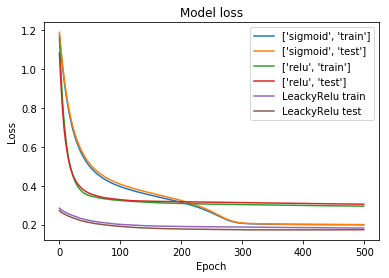

In [101]:

#MSE 0.01 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.01), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.01), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.01), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.01), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.2123868111251057 Etest: 0.21526090247290475
Etrain: 0.30175893879743015 Etest: 0.311855776820864
Etrain: 0.19755729154688148 Etest: 0.18718258227620807


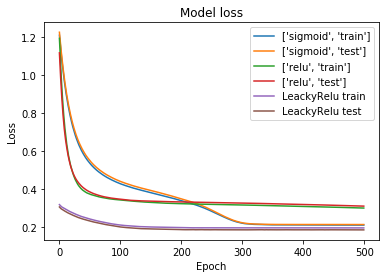

In [102]:
#MSE 0.01 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.01), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.01), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.01), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.01), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Etrain: 0.21952082583869714 Etest: 0.22450994082859585
Etrain: 0.2899129491497353 Etest: 0.3000566921196878
Etrain: 0.210051742332857 Etest: 0.2123100893838065


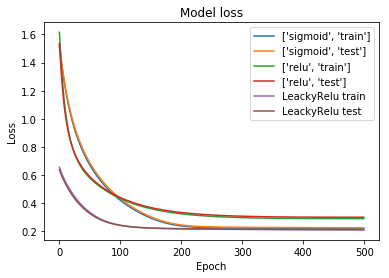

In [103]:
#MSE 0.1 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.1), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.24967985063935247 Etest: 0.25571868760245187
Etrain: 0.29010881865082155 Etest: 0.3002280525264463
Etrain: 0.22636966122953212 Etest: 0.23126016344342912


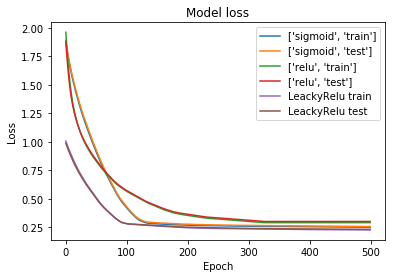

In [104]:
#MSE 0.1 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.1), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.26192896406431704 Etest: 0.2700966809477125
Etrain: 0.28985510298595335 Etest: 0.30000002338698956
Etrain: 0.22532181254619563 Etest: 0.23072808129446848


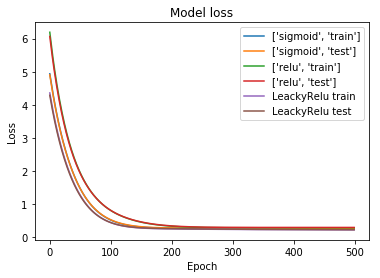

In [105]:
#MSE 1 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(1), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Etrain: 0.29217099999460044 Etest: 0.3028509374175753
Etrain: 0.292586137275189 Etest: 0.30253565683960915
Etrain: 0.29205984715822236 Etest: 0.3023149355181626


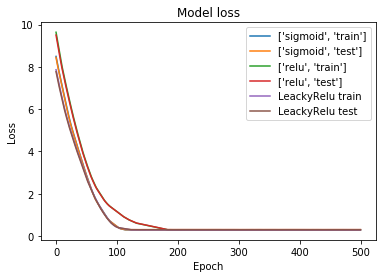

In [106]:
#MSE 1 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='mean_squared_error',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(1), use_bias=False))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=500, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][499],'Etest:',history.history['val_loss'][499])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 4.671911658872153 Etest: 4.835428556107711
Etrain: 0.5456079004179453 Etest: 0.5386520590100969
Etrain: 0.6578910766880294 Etest: 0.4955499989645822


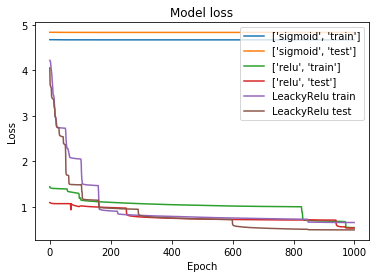

In [110]:
#BCE 0.001 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.001), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.001), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.538275418650125 Etest: 0.522637220791408
Etrain: 0.5047855298012351 Etest: 0.5194213066782271
Etrain: 0.7270923405165833 Etest: 0.5006107466561454


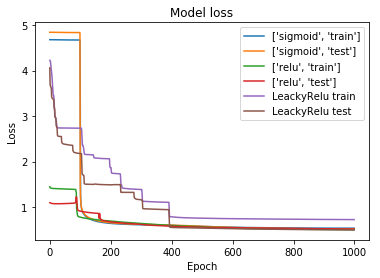

In [111]:
#BCE 0.001 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.001), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.001), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.001), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.001), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])  

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 4.671911658872153 Etest: 4.835428556107711
Etrain: 0.5845829988447364 Etest: 0.5629385369164603
Etrain: 0.7207009348892359 Etest: 0.5310103893280029


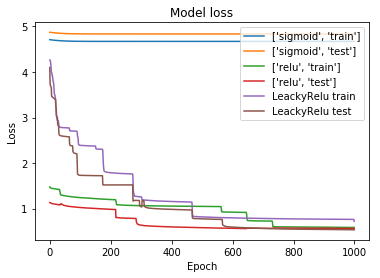

In [112]:
#BCE 0.01 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.01), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.01), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.01), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.01), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.6054606357058465 Etest: 0.614742762701852
Etrain: 0.5723044555544278 Etest: 0.5471011298043388
Etrain: 0.7598410703709736 Etest: 0.5949904135295323


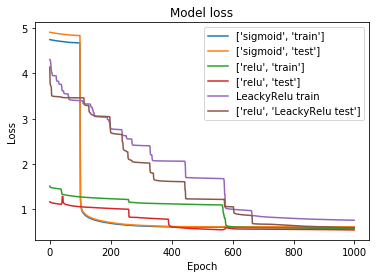

In [113]:
#BCE 0.01 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.01), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.01), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.01), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.01), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label=[act,'LeackyRelu test'])
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 4.671911658872153 Etest: 4.835428556107711
Etrain: 0.5843760520939666 Etest: 0.574678611755371
Etrain: 0.5865177353799055 Etest: 0.5760485410690308


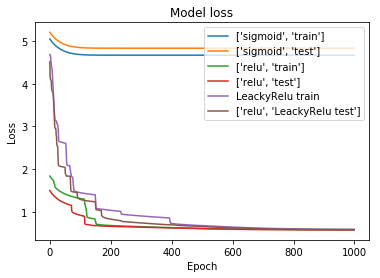

In [114]:
#BCE 0.1 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(0.1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])
 

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(0.1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(0.1), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label=[act,'LeackyRelu test'])
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.6326964569552509 Etest: 0.6429429939814977
Etrain: 0.662574159062427 Etest: 0.654169648034232
Etrain: 0.65506262710129 Etest: 0.6596049581255231


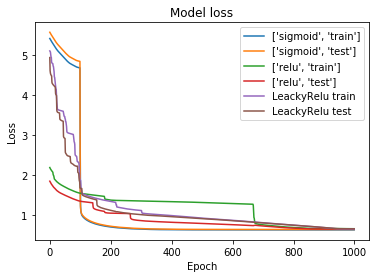

In [115]:
#BCE 0.1 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(0.1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])
    
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(0.1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(0.1), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])    
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 4.671911658872153 Etest: 4.835428556107711
Etrain: 0.6261336434866496 Etest: 0.6364232982907977
Etrain: 0.6680686635095716 Etest: 0.6802301066262382


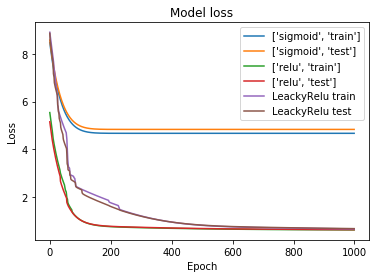

In [116]:
#BCE 1 ^2
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l2(1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])

model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l2(1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l2(1), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])  

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Etrain: 0.8208379751242302 Etest: 0.8380695751735142
Etrain: 0.7422687984319125 Etest: 0.7569629192352295
Etrain: 0.7318266886443907 Etest: 0.7454383373260498


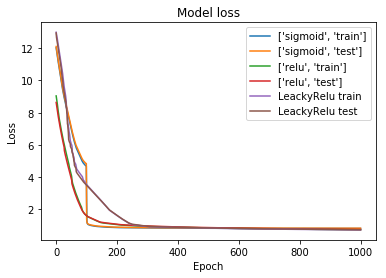

In [117]:
#BCE 1 ^1
seed(1)
set_random_seed(2)
for act in ['sigmoid','relu']:
    model = Sequential()

    model.add(Dense(units=2, activation=act, kernel_regularizer=krs.regularizers.l1(1), use_bias=True, input_shape=(9,)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(1), use_bias=False))

   #'binary_crossentropy'
   #'mean_squared_error'
    model.compile(loss='binary_crossentropy',optimizer='adam')


    history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)

    plt.plot(history.history['loss'],label=[act,'train'])
    plt.plot(history.history['val_loss'],label=[act,'test'])
    print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])
    
model = Sequential()

model.add(Dense(units=2, kernel_regularizer=krs.regularizers.l1(1), use_bias=True, input_shape=(9,)))
model.add(LeakyReLU(alpha = 0.01))
model.add(Dense(units=1, activation='linear', kernel_regularizer=krs.regularizers.l1(1), use_bias=False))
model.compile(loss='binary_crossentropy',optimizer='adam')
history = model.fit(Xtr, Ytr, validation_data=val_data,verbose=0, epochs=1000, batch_size=32)
plt.plot(history.history['loss'],label='LeackyRelu train')
plt.plot(history.history['val_loss'],label='LeackyRelu test')
print('Etrain:',history.history['loss'][999],'Etest:',history.history['val_loss'][999])
  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [0]:
#Hereafter is the solution for question 1
#It was not tested the compilation of both questions together, so it might be variables with the same names that might cause problems



In [0]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# This function calculates the error for linear unit

def errorl(X,Y,w):
    err=0
    l=len(Y)
    for ii in range (0,l-1):
        x=X[:,ii]
        y=w@x
        err=err +(Y[ii]-y)*(Y[ii]-y)
    err=err/l
    print(l)
    return err

In [ ]:

# This function calculates the error for sigmoid function

def errors(X,Y,w):
    err=0
    l=len(Y)
    for ii in range (0,l-1):
        x=X[:,ii]
        y=w@x
        y=1/(1+np.exp(-y))
        err=err +(Y[ii]-y)*(Y[ii]-y)
    err=err/l
    return err

In [ ]:
#  This function trains the neuron using a linear function
# and quadratic error and returns the error for the training data 
# and teste data it also prints a warning if there is convergence

def algoritmoa(eta, iteracoes, wi,Xbtr,Ytr,Xbte,Yte):
    w=wi#weigths
    for ii in range(iteracoes):
        d=np.zeros((1,5))
    
        for ii in (0,111):
            x=Xbtr[:,ii] #gets a vector of the tree values ()
            t=Ytr[ii] #gets the 1 value of y 
            o=w@x#output of activation function
            d=d+(t-o)*x #sum in the error function
       
        w=w+0.001*d #geting the new weight
        
        dteste=np.zeros((1,5))
        if np.array_equal(dteste,d)==True:
            print("convergence",ii)
        
    print(w)
    errtr=errorl(Xbtr,Ytr,w)
    errte=errorl(Xbte,Yte,w)
    return [errtr,errte,d]
    

In [ ]:
#  This function trains the neuron using a sigmoid function
# and quadratic error and returns the error for the training data 
# and teste data it also prints a warning if there is convergence

def algoritmob(eta, iteracoes, wi,Xbtr,Ytr,Xbte,Yte):
    w=wi#weigths
    for ii in range(iteracoes):
        d=np.zeros((1,5))
    
        for ii in (0,111):
            x=Xbtr[:,ii] #gets a vector of the tree values ()
            y=Ytr[ii] #gets the 1 value of y 
            h=1/(1+np.exp(-w@x)) #output of activation function
            d=d+(y-h)*h*(1-h)*x #sum in the error function
       
        w=w+eta*d #geting the new weight
        
        dteste=np.zeros((1,5))
        if np.array_equal(dteste,d)==True:
            print("convergence",ii)
        
    errtr=errors(Xbtr,Ytr,w)
    errte=errors(Xbte,Yte,w)
    return [errtr[0],errte[0],d[0]]
    
  

In [ ]:
#  This function trains the neuron using a sigmoid function
# and cross entropy error and returns the error for the training data 
# and teste data it also prints a warning if there is convergence

def algoritmoc(eta, iteracoes, wi,Xbtr,Ytr,Xbte,Yte):
    w=wi#weigths
    for ii in range(iteracoes):
        d=np.zeros((1,5))
    
        for ii in (0,111):
            x=Xbtr[:,ii] #gets the row ii of the matrix Xbtr 
            y=Ytr[ii] #gets the 1 value of y 
            net=w@x
            #print(net)
            o=1/(1+np.exp(-net)) #output of activation function
            #print(o)
            d=d+(y/o-(1-y)/(1-o))*o*(1-o)*x #sum in the error function
       
        w=w+eta*d #geting the new weight
        
        dteste=np.zeros((1,5))
        if np.array_equal(dteste,d)==True:
            print("convergence",ii)
        
    errtr=errors(Xbtr,Ytr,w)
    errte=errors(Xbte,Yte,w)
    return [errtr[0],errte[0]]

In [ ]:
#   This portion of the code imports de data, changes the output so that
#  there are only two classes (to be Iris-Viginica or not to be Iris-Vig
#  inica), it also splits the data into training and testing data 75%-25%


iris = datasets.load_iris()
X = iris.data[:, :] 
#Xb=np.hstack((X,np.ones((150,1)))).T
Y=(iris["target"]==2).astype(np.int)

#spliting data into training and testing data
Ytr = np.array([]) 
Yte = np.array([]) 
for i in range (0,Y.shape[0]):
    if (math.modf(i/4)[0]== 0): 
        Yte=np.insert(Yte,len(Yte),Y[i])  
    else:
        Ytr=np.insert(Ytr,len(Ytr),Y[i]) 

    
#print("Yte:",Yte,"\n")
#print("Ytr:",Ytr,"\n")


Xtr=np.array([[1,1,1,1]])
Xte=np.array([[1,1,1,1]])
for i in range (0,X.shape[0]):
    if (math.modf(i/4)[0]== 0):
        Xte=np.concatenate((Xte,[X[i]]),axis=0)
    else:
        Xtr=np.concatenate((Xtr,[X[i]]),axis=0)
        
Xtr=np.delete(Xtr,0,axis=0)
Xte=np.delete(Xte,0,axis=0)
        
Xbtr=np.concatenate((Xtr.T,np.ones((1,112))),axis=0)
Xbte=np.concatenate((Xte.T,np.ones((1,38))),axis=0)
        
#print("Xbtr:",Xbtr,"\n")
#print("Xbte:",Xbte,"\n")

In [ ]:
#We compute values to make a plot of the variation of error with
#learning rate
iter=100000
w_inicial=np.ones((1,5))
sa=0.004
count=0
eta = np.array([]) 

output_train_a=np.array([])
output_test_a=np.array([])
output_train_b=np.array([])
output_test_b=np.array([])
output_train_c=np.array([])
output_test_c=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
while sa<0.1:
    #this condition serves to increase the number of point in a zone of interest
    print("sa=", sa)
    if sa>0.008 and sa<0.012: 
        eta=np.insert(eta, count, sa)
        #To a)
        output_error_a=algoritmoa(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_a=np.insert(output_train_a, count, output_error_a[0])
        output_test_a=np.insert(output_test_a, count, output_error_a[1])
        #To b)
        output_error_b=algoritmob(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_b=np.insert(output_train_b, count, output_error_b[0])
        output_test_b=np.insert(output_test_b, count, output_error_b[1])
        #To c)
        output_error_c=algoritmoc(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_c=np.insert(output_train_c, count, output_error_c[0])
        output_test_c=np.insert(output_test_c, count, output_error_c[1])
        sa=sa+0.0001
        print("sa_in=", sa)
        count=count+1
        
    else:   
        eta=np.insert(eta, count, sa)
        #To a)
        output_error_a=algoritmoa(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_a=np.insert(output_train_a, count, output_error_a[0])
        output_test_a=np.insert(output_test_a, count, output_error_a[1])
        #To b)
        output_error_b=algoritmob(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_b=np.insert(output_train_b, count, output_error_b[0])
        output_test_b=np.insert(output_test_b, count, output_error_b[1])
        #To c)
        output_error_c=algoritmoc(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_c=np.insert(output_train_c, count, output_error_c[0])
        output_test_c=np.insert(output_test_c, count, output_error_c[1])
        sa=sa+0.0048
        count=count+1
    
    
print("Finished")

In [ ]:
#Here we make the plots of the variation of error with the learning rate
#plotting training graph
plt.plot(eta, output_train_a, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(eta, output_test_a, 'bo', color='green', linestyle='dashed', label="Test a)")
plt.plot(eta, output_train_b, 'bo', color='purple', linestyle='dashed', label="Training b)")
plt.plot(eta, output_test_b, 'bo', color='blue', linestyle='dashed', label="Test b)")
plt.plot(eta, output_train_c, 'bo', color='yellow', linestyle='dashed', label="Training c)")
plt.plot(eta, output_test_c, 'bo', color='black', linestyle='dashed', label="Test c)")
plt.xscale('log')
plt.ylim(0.1,0.2)
plt.xlabel("$\eta$")
plt.ylabel("Error")
plt.legend()
plt.yticks(np.arange(0.15,0.7,step=0.03))
plt.grid(None,'both','both')
plt.show()


In [ ]:
#We compute values to make a plot of the variation of error with
#number of epochs

iteration=np.array([])
w_inicial=np.ones((1,5))
count=0
epoch=100000
eta = 0.0105
output_train_a_e=np.array([])
output_test_a_e=np.array([])
output_train_b_e=np.array([])
output_test_b_e=np.array([])
output_train_c_e=np.array([])
output_test_c_e=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
    
while epoch<150000:
    iteration=np.insert(iteration, count, epoch)
    #To a)
    output_error_a_e=algoritmoa(eta, iteration[count], w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_a_e=np.insert(output_train_a_e, count, output_error_a_e[0])
    output_test_a_e=np.insert(output_test_a_e, count, output_error_a_e[1])
    #To b)
    output_error_b_e=algoritmob(eta, iteration[count], w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_b_e=np.insert(output_train_b_e, count, output_error_b_e[0])
    output_test_b_e=np.insert(output_test_b_e, count, output_error_b_e[1])
    #To c)
    output_error_c_e=algoritmoa(eta, iteration[count], w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_c_e=np.insert(output_train_c_e, count, output_error_c_e[0])
    output_test_c_e=np.insert(output_test_c_e, count, output_error_c_e[1])
    epoch=epoch+10000
    count=count+1
    #print(output_error_a_e)
    
print("Finished")


In [ ]:
#Here we make the plots of the variation of error with the epoch

plt.plot(eta, output_train_a_e, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(eta, output_test_a_e, 'bo', color='green', linestyle='dashed', label="Test a)")
plt.plot(eta, output_train_b_e, 'bo', color='purple', linestyle='dashed', label="Training b)")
plt.plot(eta, output_test_b_e, 'bo', color='blue', linestyle='dashed', label="Test b)")
plt.plot(eta, output_train_c_e, 'bo', color='yellow', linestyle='dashed', label="Training c)")
plt.plot(eta, output_test_c_e, 'bo', color='black', linestyle='dashed', label="Test c)")
plt.xscale('log')
plt.ylim(0.1,0.7)
plt.xlabel("eta")
plt.ylabel("Error")
plt.legend()
plt.yticks(np.arange(0,0.7,step=0.05))
plt.grid(None,'both','both')
plt.show()

In [ ]:
#We compute values to make a plot of the variation of error with
#weight initializations

iter=100000
w_inicial=np.zeros((1,5))
w_1d=0
w_t=np.array([])
count=0
eta = 0.00105
output_train_a_w=np.array([])
output_test_a_w=np.array([])
output_train_b_w=np.array([])
output_test_b_w=np.array([])
output_train_c_w=np.array([])
output_test_c_w=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
while w_1d<2:
    #this condition serves to increase the number of point in a zone of interest
    w_t=np.insert(w_t, count, w_1d)
    w_inicial=np.array([w_t[count],w_t[count],w_t[count],w_t[count],w_t[count]])
    output_error_a_w=algoritmoa(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_a_w=np.insert(output_train_a_w, count, output_error_a_w[0])
    output_test_a_w=np.insert(output_test_a_w, count, output_error_a_w[1])
    output_error_b_w=algoritmob(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_b_w=np.insert(output_train_b_w, count, output_error_b_w[0])
    output_test_b_w=np.insert(output_test_b_w, count, output_error_b_w[1])
    output_error_c_w=algoritmoc(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_c_w=np.insert(output_train_c_w, count, output_error_c_w[0])
    output_test_c_w=np.insert(output_test_c_w, count, output_error_c_w[1])
    w_1d=w_1d+0.05
    count=count+1
   # print(output_error)

print("Finished")



In [ ]:
#Here we make the plots of the variation of error with the weight initialization

plt.plot(w_t, output_train_a_w, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(w_t, output_test_a_w, 'bo', color='green', linestyle='dashed', label="Test a)")
plt.plot(w_t, output_train_b_w, 'bo', color='purple', linestyle='dashed', label="Training b)")
plt.plot(w_t, output_test_b_w, 'bo', color='blue', linestyle='dashed', label="Test b)")
plt.plot(w_t, output_train_c_w, 'bo', color='yellow', linestyle='dashed', label="Training c)")
plt.plot(w_t, output_test_c_w, 'bo', color='black', linestyle='dashed', label="Test c)")
plt.xscale('log')
plt.ylim(0.1,0.7)
plt.xlabel("w")
plt.ylabel("Error")
plt.legend()
plt.yticks(np.arange(0.15,0.7,step=0.03))
plt.grid(None,'both','both')
plt.show()

In [ ]:
#Epochs 
#We compute values to make a plot of the variation of error with
#number of epochs
#in a smaller range of epochs (for case a) and c) only)

iteration=np.array([])
w_inicial=np.ones((1,5))
count=0
epoch=1
eta = 0.0105
output_train_a_e=np.array([])
output_test_a_e=np.array([])
#output_train_b_e=np.array([])
#output_test_b_e=np.array([])
output_train_c_e=np.array([])
output_test_c_e=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
    
while epoch<1000:
    iteration=np.insert(iteration, count, epoch)
    print("iter=", iteration)
    #To a)
    output_error_a_e=algoritmoa(eta, int(iteration[count]), w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_a_e=np.insert(output_train_a_e, count, output_error_a_e[0])
    output_test_a_e=np.insert(output_test_a_e, count, output_error_a_e[1])
    #To b)
   # output_error_b_e=algoritmob(eta, iteration[count], w_inicial, Xbtr,Ytr,Xbte,Yte)
   # output_train_b_e=np.insert(output_train_b_e, count, output_error_b_e[0])
   # output_test_b_e=np.insert(output_test_b_e, count, output_error_b_e[1])
    #To c)
    output_error_c_e=algoritmoa(eta, int(iteration[count]), w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_c_e=np.insert(output_train_c_e, count, output_error_c_e[0])
    output_test_c_e=np.insert(output_test_c_e, count, output_error_c_e[1])
    epoch=epoch+5
    count=count+1
    print( output_error_a_e)
    #print(output_error_a_e)
    
print("Finished")



In [ ]:
#PLOTS EPOCH
plt.plot(iteration, output_train_a_e, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(iteration, output_test_a_e, 'bo', color='green', linestyle='dashed', label="Test a)")
#plt.plot(eta, output_train_b_e, 'bo', color='purple', linestyle='dashed', label="Training b)")
#plt.plot(eta, output_test_b_e, 'bo', color='blue', linestyle='dashed', label="Test b)")
#plt.plot(iteration, output_train_c_e, 'bo', color='yellow', linestyle='dashed', label="Training c)")
#plt.plot(iteration, output_test_c_e, 'bo', color='black', linestyle='dashed', label="Test c)")
plt.xscale('log')
plt.ylim(0.1,1)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
#plt.yticks(np.arange(0,0.7,step=0.05))
plt.grid(None,'both','both')
plt.show()



In [ ]:
#WEIGHTS!!
#We compute values to make a plot of the variation of error with
#for a smaller value of epochs (for case a) and c) only)
#since for high values of epoch, final weights 
#weren't affected by initial parameters

iter=100
w_inicial=np.zeros((1,5))
w_1d=0
w_t=np.array([])
count=0
eta = 0.00105
output_train_a_w=np.array([])
output_test_a_w=np.array([])
#output_train_b_w=np.array([])
#output_test_b_w=np.array([])
output_train_c_w=np.array([])
output_test_c_w=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
while w_1d<2:
    #this condition serves to increase the number of point in a zone of interest
    w_t=np.insert(w_t, count, w_1d)
    w_inicial=np.array([w_t[count],w_t[count],w_t[count],w_t[count],w_t[count]])
    output_error_a_w=algoritmoa(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_a_w=np.insert(output_train_a_w, count, output_error_a_w[0])
    output_test_a_w=np.insert(output_test_a_w, count, output_error_a_w[1])
    #output_error_b_w=algoritmob(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    #output_train_b_w=np.insert(output_train_b_w, count, output_error_b_w[0])
    #output_test_b_w=np.insert(output_test_b_w, count, output_error_b_w[1])
    output_error_c_w=algoritmoc(eta, iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
    output_train_c_w=np.insert(output_train_c_w, count, output_error_c_w[0])
    output_test_c_w=np.insert(output_test_c_w, count, output_error_c_w[1])
    w_1d=w_1d+0.05
    count=count+1
   # print(output_error)

print("Finished")

In [ ]:
#WEIGHTS PLOTS!!
#Here we make the plots of the variation of error with the weight initialization

plt.plot(w_t, output_train_a_w, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(w_t, output_test_a_w, 'bo', color='green', linestyle='dashed', label="Test a)")
#plt.plot(w_t, output_train_b_w, 'bo', color='purple', linestyle='dashed', label="Training b)")
#plt.plot(w_t, output_test_b_w, 'bo', color='blue', linestyle='dashed', label="Test b)")
plt.plot(w_t, output_train_c_w, 'bo', color='yellow', linestyle='dashed', label="Training c)")
plt.plot(w_t, output_test_c_w, 'bo', color='black', linestyle='dashed', label="Test c)")
#plt.xscale('log')
plt.ylim(0.1,0.7)
plt.xlabel("w")
plt.ylabel("Error")
plt.legend()
plt.yticks(np.arange(0.15,0.7,step=0.03))
plt.grid(None,'both','both')
plt.show()

In [ ]:
#ETA !!
#We compute values to make a plot of the variation of error with
#learning rate
#for a smaller range of epochs (for case a) and c) only)
#since for high values of epoch, final weights 
#weren't affected by initial parameters
iter=100
w_inicial=np.ones((1,5))
sa=0.004
count=0
eta = np.array([]) 

output_train_a=np.array([])
output_test_a=np.array([])
output_train_c=np.array([])
output_test_c=np.array([])
 #Ytr=np.insert(Ytr,len(Ytr),Y[i]) 
while sa<0.1:
    #this condition serves to increase the number of point in a zone of interest
    print("sa=", sa)
    if sa>0.008 and sa<0.012: 
        eta=np.insert(eta, count, sa)
        #To a)
        output_error_a=algoritmoa(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_a=np.insert(output_train_a, count, output_error_a[0])
        output_test_a=np.insert(output_test_a, count, output_error_a[1])
        #To c)
        output_error_c=algoritmoc(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_c=np.insert(output_train_c, count, output_error_c[0])
        output_test_c=np.insert(output_test_c, count, output_error_c[1])
        sa=sa+0.0001
        print("sa_in=", sa)
        count=count+1
        
    else:   
        eta=np.insert(eta, count, sa)
        #To a)
        output_error_a=algoritmoa(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_a=np.insert(output_train_a, count, output_error_a[0])
        output_test_a=np.insert(output_test_a, count, output_error_a[1])
        #To c)
        output_error_c=algoritmoc(eta[count], iter, w_inicial, Xbtr,Ytr,Xbte,Yte)
        output_train_c=np.insert(output_train_c, count, output_error_c[0])
        output_test_c=np.insert(output_test_c, count, output_error_c[1])
        sa=sa+0.0048
        count=count+1
    
    
print("Finished")

In [ ]:
#ETA PLOTS!!

#Here we make the plots of the variation of error with the learning rate
#plotting training graph
plt.plot(eta, output_train_a, 'bo', color='red', linestyle='dashed', label="Training a)")
plt.plot(eta, output_test_a, 'bo', color='green', linestyle='dashed', label="Test a)")
plt.plot(eta, output_train_c, 'bo', color='yellow', linestyle='dashed', label="Training c)")
plt.plot(eta, output_test_c, 'bo', color='black', linestyle='dashed', label="Test c)")
plt.xscale('log')
plt.ylim(0.1,0.3)
plt.xlabel("$\eta$")
plt.ylabel("Error")
plt.legend()
plt.yticks(np.arange(0.15,0.3,step=0.03))
plt.grid(None,'both','both')
plt.show()

In [ ]:
#case a) error with optimal initial parameters
wi=np.array([1,1,1,1,1])
err=algoritmoa(0.0105,1000,wi,Xbtr,Ytr,Xbte,Yte)
print("final error train=",err[0])
print("final error test=",err[1])

In [ ]:
#case b) error with optimal initial parameters
wi=np.array([0.75,0.75,0.75,0.75,0.75])
err=algoritmob(0.0105,100000,wi,Xbtr,Ytr,Xbte,Yte)
print("final error train=",err[0])
print("final error test=",err[1])

In [ ]:
#case c) error with optimal initial parameters
wi=np.zeros((1,5))
err=algoritmoc(0.009,1000,wi,Xbtr,Ytr,Xbte,Yte)
print("final error train=",err[0])
print("final error test=",err[1])